In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pasos
- Cargar datos 
- Normalizar datos 
- Agregar una columna de unos
- Calcular la prediccion (theta tanspuesta por X vector) 
- Calcular el costo (error)
- Dos formas para calcular los parámetros (thetas)
    - Ecuacion normal (X entrenaminto * producto matricil-< inversa - Xt entrenamiento Y(años que vivere))
    - Gradiente Descendiente 

In [ ]:
def load_data(filename):
    return pd.read_csv(filename, delim_whitespace=True)

In [98]:
def normalization(data):
    mean_ = data.mean(axis=0) 
    std_ = data.std(axis=0) #estandar
    return (data - mean_)/std_

In [99]:
def train_test(data,col):
    X_train = data[:int((70*len(data))/100), :col]
    y_train = data[:int((70*len(data))/100), col]
    X_test = data[int((70*len(data))/100):, :col]
    y_test = data[int((70*len(data))/100):, col]
    return X_train, y_train, X_test, y_test

In [100]:
# Add a column of ones (bias)
def add_ones(X_train, y_train, X_test, y_test):
    n_exa_train = len(y_train)
    n_exa_test = len(y_test)

    X_train = np.concatenate((np.ones([n_exa_train, 1]), X_train), axis=1)
    X_test = np.concatenate((np.ones([n_exa_test, 1]), X_test), axis=1)
    
    return X_train, X_test

In [101]:
def prediction(theta, X):
    return np.dot(X, theta)

In [102]:
def calculate_cost(X, y, theta):
    #J(theta) = 1/2m sum(h(x) - y)^2
    m = X.shape[0] #nbr of training data 
    pred = prediction(theta, X)
    c = (1/(2*m)) * np.sum(np.square(pred - y))
    return c

In [103]:
def gradient_descent(X, y, theta, nro_iter, learning_rate): 
    m = X.shape[0] #nbr of training data
    #cost_history = np.empty(nro_iter, dtype=float) 
    cost_history = np.zeros(nro_iter) 
    #h = calculate_cost(X, y, theta)
    for i in range(nro_iter):
        pred = prediction(theta, X)
        pred = pred - y        
        theta = theta - (learning_rate * (np.dot(X.T,pred)/m))
        cost_history[i] = calculate_cost( X, y, theta) 
    return theta, cost_history

In [104]:
def normal_equation(X, y):
    theta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
    #theta = np.linalg.inv(X.T.dot(X)).dot((X.T).dot(y))
    return theta

#### EXPERIMENTO I

In [105]:
def NE_find_parameters():
    fdata = load_data('petrol_consumption.csv')
    data = normalization(fdata)
    data = data.values
    X_train, y_train, X_test, y_test = train_test(data,data.shape[1]-1)
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    theta = normal_equation(X_train, y_train)
    print("Weight Normal Equation: ", theta)
    cost = calculate_cost(X_train, y_train, theta)
    print("Cost: ", cost)

NE_find_parameters()

Weight Normal Equation:  [-0.08660972 -0.09203601 -0.36687041  0.1072892   0.64775736]
Cost:  0.1033688822072403


In [106]:
def GD_find_parameters():
    fdata = load_data('petrol_consumption.csv')
    data = normalization(fdata)
    data = data.values
    
    X_train, y_train, X_test, y_test = train_test(data,data.shape[1]-1)
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    n_features = X_train.shape[1]
    theta = np.zeros(n_features)
    #theta = np.random.rand(n_features)

    epochs = [500,800,1100,14000,1700,2000,2300,2600,2900,3200]  
    learn_rates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    
    result_train = np.empty([len(learn_rates),len(epochs)])
    result_test = np.empty([len(learn_rates),len(epochs)])
    for epoch in epochs:
        for learn_rate in learn_rates:
            theta_gd, cost_history = gradient_descent(X_train, y_train, theta, epoch, learn_rate)
            error_train = calculate_cost(X_train, y_train, theta_gd)
            error_test = calculate_cost(X_test, y_test, theta_gd)
            
            result_train = error_train
            result_test = error_test
    pdObj = pd.DataFrame(result_train, index = learn_rates, columns = epochs) 
    pdObj1 = pd.DataFrame(result_test, index = learn_rates, columns = epochs) 
    return pdObj
GD_find_parameters()

,500,800,1100,14000,1700,2000,2300,2600,2900,3200
0.05,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369
0.10,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369
0.20,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369
0.30,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369
0.40,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369
0.50,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369


Weights of gradient_descent - training data:  [ 0.01720443  0.30300854 -0.13773328  0.3699597   0.49912901] 

Weights of gradient_descent - testing data:  [ 0.01720443  0.30300854 -0.13773328  0.3699597   0.49912901] 



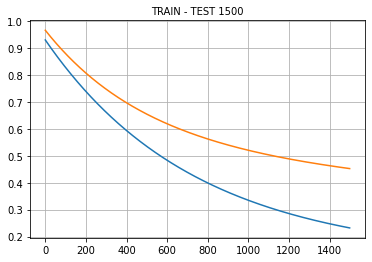

Weights of gradient_descent - training data:  [-0.01825132  0.2635718  -0.1752954   0.35975697  0.53244088] 

Weights of gradient_descent - testing data:  [-0.01825132  0.2635718  -0.1752954   0.35975697  0.53244088] 



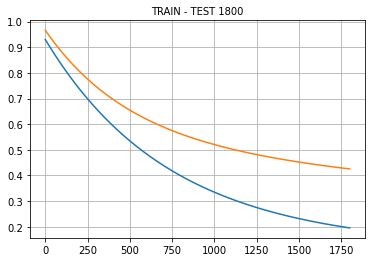

Weights of gradient_descent - training data:  [-0.10718551 -0.02699529 -0.37211124  0.16197415  0.66745114] 

Weights of gradient_descent - testing data:  [-0.10718551 -0.02699529 -0.37211124  0.16197415  0.66745114] 



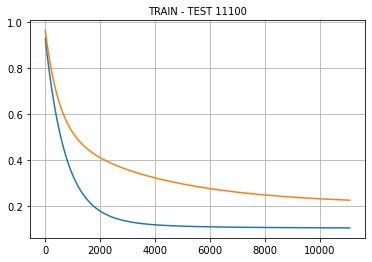

Weights of gradient_descent - training data:  [-0.08660972 -0.09203599 -0.36687042  0.10728921  0.64775736] 

Weights of gradient_descent - testing data:  [-0.08660972 -0.09203599 -0.36687042  0.10728921  0.64775736] 



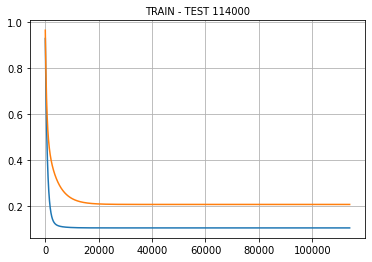

Weights of gradient_descent - training data:  [-0.10529744 -0.03247888 -0.37201494  0.15724488  0.66618683] 

Weights of gradient_descent - testing data:  [-0.10529744 -0.03247888 -0.37201494  0.15724488  0.66618683] 



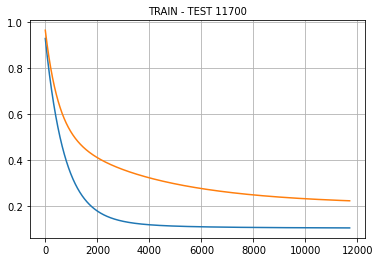

Weights of gradient_descent - training data:  [-0.10441918 -0.0350433  -0.37193638  0.1550457   0.66556202] 

Weights of gradient_descent - testing data:  [-0.10441918 -0.0350433  -0.37193638  0.1550457   0.66556202] 



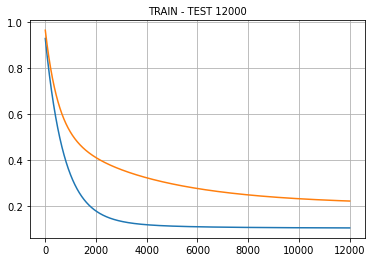

Weights of gradient_descent - training data:  [-0.10358279 -0.0374966  -0.37184272  0.15294878  0.66494531] 

Weights of gradient_descent - testing data:  [-0.10358279 -0.0374966  -0.37184272  0.15294878  0.66494531] 



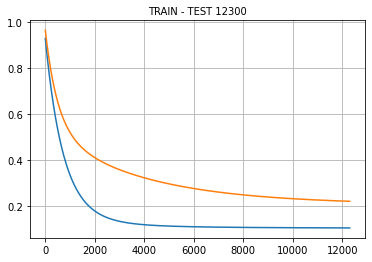

Weights of gradient_descent - training data:  [-0.10278665 -0.03984374 -0.37173711  0.15094862  0.66433857] 

Weights of gradient_descent - testing data:  [-0.10278665 -0.03984374 -0.37173711  0.15094862  0.66433857] 



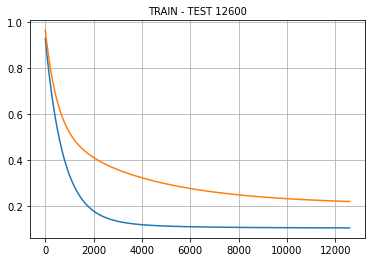

Weights of gradient_descent - training data:  [-0.10202909 -0.04208944 -0.37162222  0.1490401   0.6637433 ] 

Weights of gradient_descent - testing data:  [-0.10202909 -0.04208944 -0.37162222  0.1490401   0.6637433 ] 



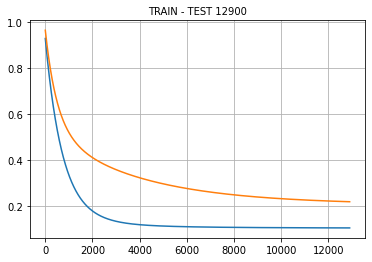

Weights of gradient_descent - training data:  [-0.10130843 -0.04423818 -0.37150028  0.14721848  0.6631607 ] 

Weights of gradient_descent - testing data:  [-0.10130843 -0.04423818 -0.37150028  0.14721848  0.6631607 ] 



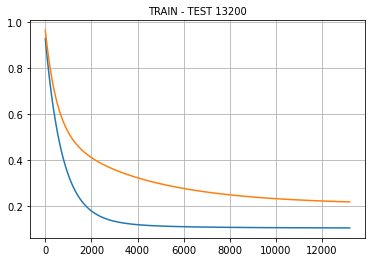

In [107]:
def GD_ploteo():
    fdata = load_data('petrol_consumption.csv')
    data = normalization(fdata)
    data = data.values
    X_train, y_train, X_test, y_test = train_test(data,data.shape[1]-1)
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    n_features = X_train.shape[1]
    #theta = np.zeros(n_features)
    theta = np.random.rand(n_features)

    epochs = [1500,1800,11100,114000,11700,12000,12300,12600,12900,13200]  
    learn_rate = 0.0005

    for epoch in epochs:
        theta_gd, cost_history = gradient_descent(X_train, y_train, theta, epoch, learn_rate)
        theta_gd1, cost_history1 = gradient_descent(X_test, y_test, theta, epoch, learn_rate)
        error_train = calculate_cost(X_train, y_train, theta_gd)
        error_test = calculate_cost(X_test, y_test, theta_gd)
        
        fig, ax = plt.subplots()
        plt.plot(range(len(cost_history)), cost_history)
        plt.plot(range(len(cost_history1)), cost_history1)
        plt.title('TRAIN - TEST '+str(epoch), {'fontsize':10})
        print("Weights of gradient_descent - training data: ", theta_gd, "\n")
        print("Weights of gradient_descent - testing data: ", theta_gd, "\n")
        ax.grid(True)
        plt.show()
GD_ploteo()

In [117]:
def H_find_parameters():
    fdata = pd.read_csv('Housing.csv')
    fdata = fdata.replace(to_replace='yes',value=1,regex=True)
    fdata = fdata.replace(to_replace='no',value=0,regex=True)

    data = normalization(fdata)
    data = data.values

    X_train, y_train, X_test, y_test = train_test(data,0)
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    n_features = X_train.shape[1]
    theta = np.zeros(n_features)

    epochs = [1500,1800,11100,114000,11700,12000,12300,12600,12900,13200]  
    learn_rates = [0.0005,0.005,0.05,1]
    
    result_train = np.empty([len(learn_rates),len(epochs)])
    result_test = np.empty([len(learn_rates),len(epochs)])
    for epoch in epochs:
        for learn_rate in learn_rates:
            theta_gd, cost_history = gradient_descent(X_train, y_train, theta, epoch, learn_rate)
            error_train = calculate_cost(X_train, y_train, theta_gd)
            error_test = calculate_cost(X_test, y_test, theta_gd)
            
            result_train = error_train
            result_test = error_test
    pdObj = pd.DataFrame(result_train, index = learn_rates, columns = epochs) 
    pdObj1 = pd.DataFrame(result_test, index = learn_rates, columns = epochs) 
    return pdObj

H_find_parameters()


,1500,1800,11100,114000,11700,12000,12300,12600,12900,13200
0.0005,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295
0.0050,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295
0.0500,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295
1.0000,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295,0.244295


Weights of gradient_descent - training data:  [-0.27429616] 

Weights of gradient_descent - testing data:  [-0.27429616] 



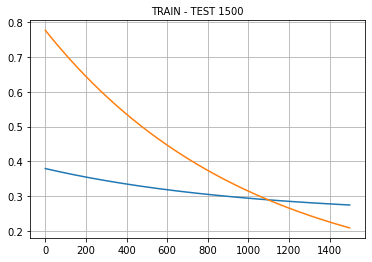

Weights of gradient_descent - training data:  [-0.30849718] 

Weights of gradient_descent - testing data:  [-0.30849718] 



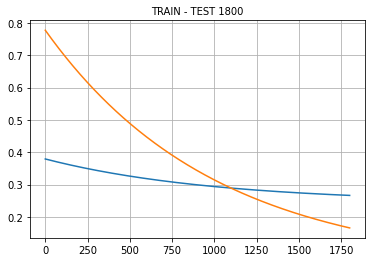

Weights of gradient_descent - training data:  [-0.51775613] 

Weights of gradient_descent - testing data:  [-0.51775613] 



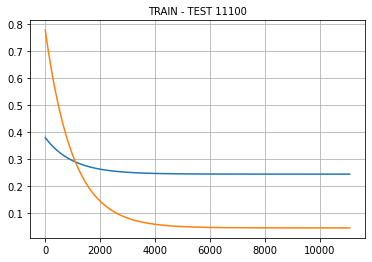

Weights of gradient_descent - training data:  [-0.51977393] 

Weights of gradient_descent - testing data:  [-0.51977393] 



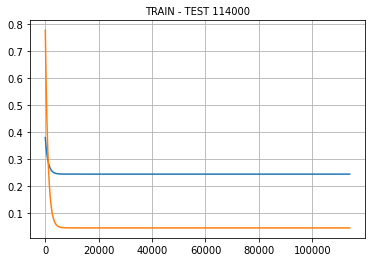

Weights of gradient_descent - training data:  [-0.51827922] 

Weights of gradient_descent - testing data:  [-0.51827922] 



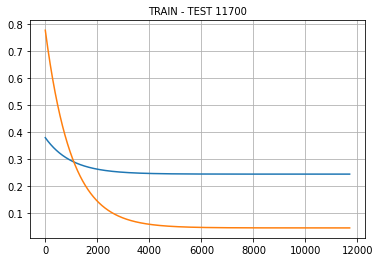

Weights of gradient_descent - training data:  [-0.51848747] 

Weights of gradient_descent - testing data:  [-0.51848747] 



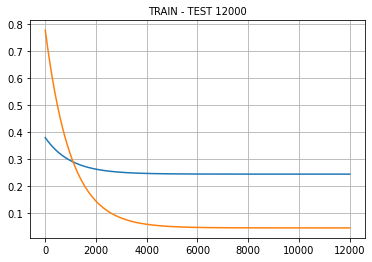

Weights of gradient_descent - training data:  [-0.5186667] 

Weights of gradient_descent - testing data:  [-0.5186667] 



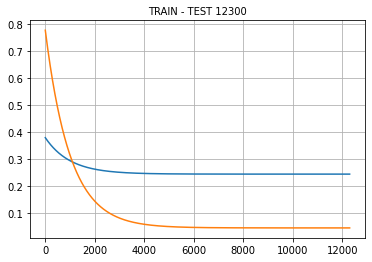

Weights of gradient_descent - training data:  [-0.51882097] 

Weights of gradient_descent - testing data:  [-0.51882097] 



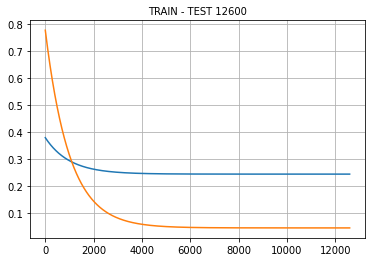

Weights of gradient_descent - training data:  [-0.51895374] 

Weights of gradient_descent - testing data:  [-0.51895374] 



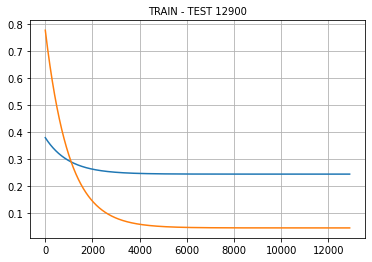

Weights of gradient_descent - training data:  [-0.51906801] 

Weights of gradient_descent - testing data:  [-0.51906801] 



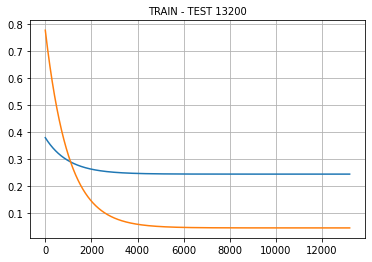

In [118]:
def H_ploteo():
    fdata = pd.read_csv('Housing.csv')
    fdata = fdata.replace(to_replace='yes',value=1,regex=True)
    fdata = fdata.replace(to_replace='no',value=0,regex=True)

    data = normalization(fdata)
    data = data.values

    X_train, y_train, X_test, y_test = train_test(data,0)
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    n_features = X_train.shape[1]
    theta = np.zeros(n_features)

    epochs = [1500,1800,11100,114000,11700,12000,12300,12600,12900,13200]  
    learn_rate = 0.0005

    for epoch in epochs:
        theta_gd, cost_history = gradient_descent(X_train, y_train, theta, epoch, learn_rate)
        theta_gd1, cost_history1 = gradient_descent(X_test, y_test, theta, epoch, learn_rate)
        error_train = calculate_cost(X_train, y_train, theta_gd)
        error_test = calculate_cost(X_test, y_test, theta_gd)
        
        fig, ax = plt.subplots()
        plt.plot(range(len(cost_history)), cost_history)
        plt.plot(range(len(cost_history1)), cost_history1)
        plt.title('TRAIN - TEST '+str(epoch), {'fontsize':10})
        print("Weights of gradient_descent - training data: ", theta_gd, "\n")
        print("Weights of gradient_descent - testing data: ", theta_gd, "\n")
        ax.grid(True)
        plt.show()
H_ploteo()